In [1]:
!pip install statsmodels --quiet
!pip install seaborn --quiet

# ✅ Step 2: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset

In [3]:
# We'll use the 'survey' dataset which contains height data
data = get_rdataset("survey", "MASS").data

In [4]:
population_df = data.dropna(subset=['Height'])
population_df = population_df[population_df['Sex'] == 'Male']
population = population_df['Height']

In [5]:
pop_mean = population.mean()
pop_std = population.std()
print(f"Population Mean Height: {pop_mean:.2f} cm")
print(f"Population Std Dev: {pop_std:.2f} cm")

Population Mean Height: 178.83 cm
Population Std Dev: 8.38 cm


In [6]:
sample = population.sample(n=50, random_state=42)
sample_mean = sample.mean()
print(f"\nSample Mean Height: {sample_mean:.2f} cm")


Sample Mean Height: 179.86 cm


In [7]:
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = sample.sample(n=50, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

bootstrap_means = np.array(bootstrap_means)


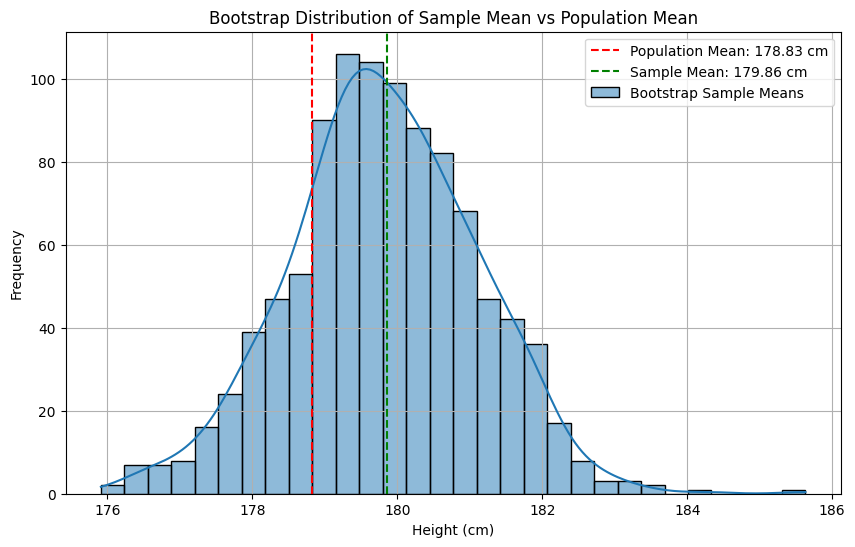

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, label='Bootstrap Sample Means')
plt.axvline(pop_mean, color='red', linestyle='--', label=f'Population Mean: {pop_mean:.2f} cm')
plt.axvline(sample_mean, color='green', linestyle='--', label=f'Sample Mean: {sample_mean:.2f} cm')
plt.title('Bootstrap Distribution of Sample Mean vs Population Mean')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Sample Mean: 179.86 cm
Bootstrap Mean: 179.84 cm
Bootstrap SE: 1.25
Bias: -0.0176
95% CI (Percentile): [177.41, 182.25]
95% CI (Basic): [177.47, 182.31]


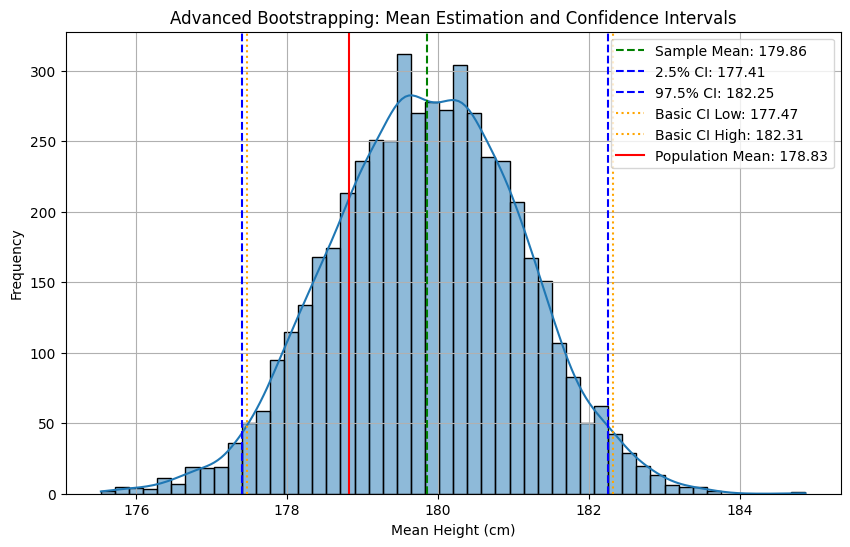

In [9]:
# ✅ Bootstrap Resampling
n_iterations = 5000
bootstrap_means = [
    sample.sample(n=50, replace=True).mean()
    for _ in range(n_iterations)
]
bootstrap_means = np.array(bootstrap_means)

# ✅ Bootstrap Statistics
bootstrap_mean = bootstrap_means.mean()
bootstrap_std = bootstrap_means.std()  # Standard Error
bias = bootstrap_mean - sample_mean

# ✅ Confidence Intervals
ci_low, ci_high = np.percentile(bootstrap_means, [2.5, 97.5])  # Percentile method
basic_ci_low = 2 * sample_mean - ci_high  # Basic method
basic_ci_high = 2 * sample_mean - ci_low

# ✅ Print Stats
print(f"\nSample Mean: {sample_mean:.2f} cm")
print(f"Bootstrap Mean: {bootstrap_mean:.2f} cm")
print(f"Bootstrap SE: {bootstrap_std:.2f}")
print(f"Bias: {bias:.4f}")
print(f"95% CI (Percentile): [{ci_low:.2f}, {ci_high:.2f}]")
print(f"95% CI (Basic): [{basic_ci_low:.2f}, {basic_ci_high:.2f}]")

# ✅ Plot Bootstrap Distribution with CIs
plt.figure(figsize=(10,6))
sns.histplot(bootstrap_means, bins=50, kde=True)
plt.axvline(sample_mean, color='green', linestyle='--', label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(ci_low, color='blue', linestyle='--', label=f'2.5% CI: {ci_low:.2f}')
plt.axvline(ci_high, color='blue', linestyle='--', label=f'97.5% CI: {ci_high:.2f}')
plt.axvline(basic_ci_low, color='orange', linestyle=':', label=f'Basic CI Low: {basic_ci_low:.2f}')
plt.axvline(basic_ci_high, color='orange', linestyle=':', label=f'Basic CI High: {basic_ci_high:.2f}')
plt.axvline(pop_mean, color='red', linestyle='-', label=f'Population Mean: {pop_mean:.2f}')
plt.title("Advanced Bootstrapping: Mean Estimation and Confidence Intervals")
plt.xlabel("Mean Height (cm)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

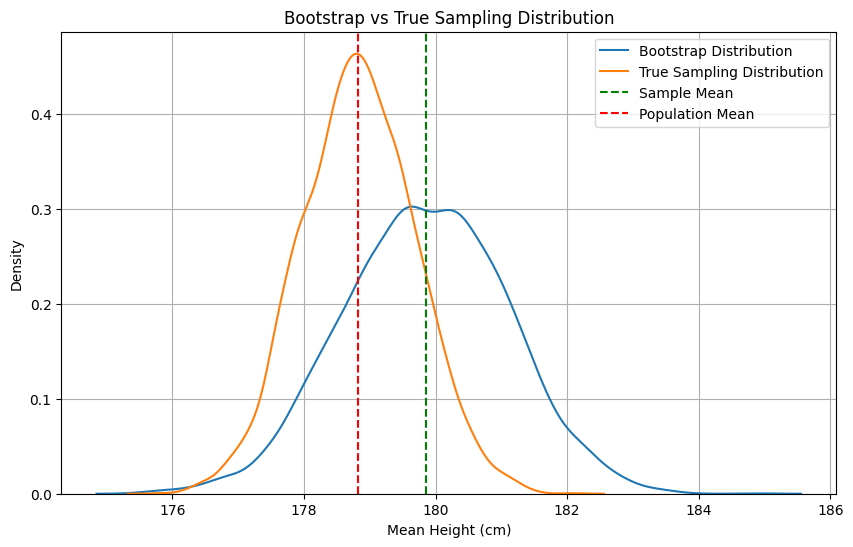

In [10]:
# ✅ Generate True Sampling Distribution from the Population (for comparison)
sampling_distribution = [
    population.sample(n=50).mean()
    for _ in range(5000)
]

# ✅ Compare Both Distributions
plt.figure(figsize=(10,6))
sns.kdeplot(bootstrap_means, label='Bootstrap Distribution')
sns.kdeplot(sampling_distribution, label='True Sampling Distribution')
plt.axvline(sample_mean, color='green', linestyle='--', label='Sample Mean')
plt.axvline(pop_mean, color='red', linestyle='--', label='Population Mean')
plt.title("Bootstrap vs True Sampling Distribution")
plt.xlabel("Mean Height (cm)")
plt.legend()
plt.grid(True)
plt.show()
